In [1]:
import matplotlib.pyplot
import numpy
import pandas
import seaborn

import time
import uszipcode

%matplotlib inline

In [2]:
training = pandas.read_csv("./b765dc3d8076-trainset.csv")

# Prilimnary cleaning
def fraud_mapping(x):
    if x=="Non-Fraud": return 1
    elif x=="Fraud": return 0
training['FRAUD_NONFRAUD'] = training['FRAUD_NONFRAUD'].map(lambda x : fraud_mapping(x) )

# always the same value
training.drop(columns=['ACTN_CD','ACTN_INTNL_TXT','TRAN_TYPE_CD'], inplace=True)

# TRAN_TS , TRAN_DT , ACTVY_DT all represent the same date (but TRAN_TS have time of day as well)
training.drop(columns= ['TRAN_DT','ACTVY_DT'] , inplace=True)


In [3]:
# Missing variables
display(training.info())

for col in training.columns:
    if col=='FRAUD_NONFRAUD': continue
    if not training[col].isnull().values.any(): continue
    tempDataFrame = pandas.DataFrame()
    tempDataFrame['FRAUD_NONFRAUD'] = training['FRAUD_NONFRAUD']
    tempDataFrame[col] = training[col]
    display(  tempDataFrame.groupby(tempDataFrame[col].isnull() ).describe()  )
    

# create a dataset for just the missing zeros and map: {0: not missing, 1: missing}
tempDataFrame = pandas.DataFrame()
for col in training.columns:
    if not training[col].isnull().values.any(): continue
    tempDataFrame[col] = training[col]
    if col != 'FRAUD_NONFRAUD':
        tempDataFrame[col] = tempDataFrame[col].map( lambda x : 0 ,  na_action='ignore' )
        tempDataFrame[col] = tempDataFrame[col].fillna(1)


for col in training.columns:
    if not training[col].isnull().values.any(): continue
    print("\ngrouped by whether: " + str(col)+" is missing:")
    display(tempDataFrame.groupby(tempDataFrame[col]==1 ).mean() ) 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TRAN_AMT                 14000 non-null  float64
 1   ACCT_PRE_TRAN_AVAIL_BAL  14000 non-null  float64
 2   CUST_AGE                 14000 non-null  int64  
 3   OPEN_ACCT_CT             14000 non-null  int64  
 4   WF_dvc_age               14000 non-null  int64  
 5   PWD_UPDT_TS              10875 non-null  object 
 6   CARR_NAME                11291 non-null  object 
 7   RGN_NAME                 11291 non-null  object 
 8   STATE_PRVNC_TXT          11291 non-null  object 
 9   ALERT_TRGR_CD            14000 non-null  object 
 10  DVC_TYPE_TXT             12239 non-null  object 
 11  AUTHC_PRIM_TYPE_CD       14000 non-null  object 
 12  AUTHC_SCNDRY_STAT_TXT    13926 non-null  object 
 13  CUST_ZIP                 14000 non-null  int64  
 14  CUST_STATE            

None

FRAUD_NONFRAUD                                             
                     count      mean       std  min  25%  50%  75%  max
PWD_UPDT_TS                                                            
False              10875.0  0.666391  0.471524  0.0  0.0  1.0  1.0  1.0
True                3125.0  0.828480  0.377023  0.0  1.0  1.0  1.0  1.0

FRAUD_NONFRAUD                                             
                   count      mean       std  min  25%  50%  75%  max
CARR_NAME                                                            
False            11291.0  0.805597  0.395758  0.0  1.0  1.0  1.0  1.0
True              2709.0  0.273164  0.445666  0.0  0.0  0.0  1.0  1.0

FRAUD_NONFRAUD                                             
                  count      mean       std  min  25%  50%  75%  max
RGN_NAME                                                            
False           11291.0  0.805597  0.395758  0.0  1.0  1.0  1.0  1.0
True             2709.0  0.273164  0.445666  0.0  0.0  0.0  1.0  1.0

FRAUD_NONFRAUD                                             
                         count      mean       std  min  25%  50%  75%  max
STATE_PRVNC_TXT                                                            
False                  11291.0  0.805597  0.395758  0.0  1.0  1.0  1.0  1.0
True                    2709.0  0.273164  0.445666  0.0  0.0  0.0  1.0  1.0

FRAUD_NONFRAUD                                             
                      count      mean       std  min  25%  50%  75%  max
DVC_TYPE_TXT                                                            
False               12239.0  0.737315  0.440111  0.0  0.0  1.0  1.0  1.0
True                 1761.0  0.461102  0.498626  0.0  0.0  0.0  1.0  1.0

FRAUD_NONFRAUD                                         \
                               count      mean      std  min  25%  50%  75%   
AUTHC_SCNDRY_STAT_TXT                                                         
False                        13926.0  0.700991  0.45784  0.0  0.0  1.0  1.0   
True                            74.0  1.000000  0.00000  1.0  1.0  1.0  1.0   

                            
                       max  
AUTHC_SCNDRY_STAT_TXT       
False                  1.0  
True                   1.0

FRAUD_NONFRAUD                                             
                    count      mean       std  min  25%  50%  75%  max
CUST_STATE                                                            
False             13964.0  0.701805  0.457482  0.0  0.0  1.0  1.0  1.0
True                 36.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0

FRAUD_NONFRAUD                                             
                        count      mean       std  min  25%  50%  75%  max
PH_NUM_UPDT_TS                                                            
False                  6939.0  0.594178  0.491086  0.0  0.0  1.0  1.0  1.0
True                   7061.0  0.809092  0.393044  0.0  1.0  1.0  1.0  1.0


grouped by whether: PWD_UPDT_TS is missing:


,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,DVC_TYPE_TXT,AUTHC_SCNDRY_STAT_TXT,CUST_STATE,PH_NUM_UPDT_TS
PWD_UPDT_TS,,,,,,,,
False,0.0,0.218023,0.218023,0.218023,0.128184,0.00377,0.002667,0.499862
True,1.0,0.108160,0.108160,0.108160,0.117440,0.01056,0.002240,0.520000



grouped by whether: CARR_NAME is missing:


,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,DVC_TYPE_TXT,AUTHC_SCNDRY_STAT_TXT,CUST_STATE,PH_NUM_UPDT_TS
CARR_NAME,,,,,,,,
False,0.246834,0.0,0.0,0.0,0.114073,0.006288,0.002746,0.538482
True,0.124769,1.0,1.0,1.0,0.174603,0.001107,0.001846,0.362126



grouped by whether: RGN_NAME is missing:


,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,DVC_TYPE_TXT,AUTHC_SCNDRY_STAT_TXT,CUST_STATE,PH_NUM_UPDT_TS
RGN_NAME,,,,,,,,
False,0.246834,0.0,0.0,0.0,0.114073,0.006288,0.002746,0.538482
True,0.124769,1.0,1.0,1.0,0.174603,0.001107,0.001846,0.362126



grouped by whether: STATE_PRVNC_TXT is missing:


,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,DVC_TYPE_TXT,AUTHC_SCNDRY_STAT_TXT,CUST_STATE,PH_NUM_UPDT_TS
STATE_PRVNC_TXT,,,,,,,,
False,0.246834,0.0,0.0,0.0,0.114073,0.006288,0.002746,0.538482
True,0.124769,1.0,1.0,1.0,0.174603,0.001107,0.001846,0.362126



grouped by whether: DVC_TYPE_TXT is missing:


,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,DVC_TYPE_TXT,AUTHC_SCNDRY_STAT_TXT,CUST_STATE,PH_NUM_UPDT_TS
DVC_TYPE_TXT,,,,,,,,
False,0.225345,0.182695,0.182695,0.182695,0.0,0.005229,0.002778,0.512705
True,0.208404,0.268597,0.268597,0.268597,1.0,0.005679,0.001136,0.446337



grouped by whether: AUTHC_SCNDRY_STAT_TXT is missing:


,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,DVC_TYPE_TXT,AUTHC_SCNDRY_STAT_TXT,CUST_STATE,PH_NUM_UPDT_TS
AUTHC_SCNDRY_STAT_TXT,,,,,,,,
False,0.222031,0.194313,0.194313,0.194313,0.125736,0.0,0.002585,0.504165
True,0.445946,0.040541,0.040541,0.040541,0.135135,1.0,0.000000,0.540541



grouped by whether: CUST_STATE is missing:


,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,DVC_TYPE_TXT,AUTHC_SCNDRY_STAT_TXT,CUST_STATE,PH_NUM_UPDT_TS
CUST_STATE,,,,,,,,
False,0.223288,0.193641,0.193641,0.193641,0.125967,0.005299,0.0,0.504297
True,0.194444,0.138889,0.138889,0.138889,0.055556,0.000000,1.0,0.527778



grouped by whether: PH_NUM_UPDT_TS is missing:


,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,DVC_TYPE_TXT,AUTHC_SCNDRY_STAT_TXT,CUST_STATE,PH_NUM_UPDT_TS
PH_NUM_UPDT_TS,,,,,,,,
False,0.216169,0.249027,0.249027,0.249027,0.140510,0.004900,0.002450,0.0
True,0.230137,0.138932,0.138932,0.138932,0.111316,0.005665,0.002691,1.0


In [4]:
    # Will add new variable: Location_Missing 0: not missing  1: missing
    # for when CARR_NAME, RGN_NAME, STATE_PRVNC_TXT are all missing together

    training['CARR_Missing'] = training['CARR_NAME']
    training['CARR_Missing'] = training['CARR_Missing'].map( lambda x : 0 ,  na_action='ignore' )
    training['CARR_Missing'] = training['CARR_Missing'].fillna(1)
    training['CARR_Missing'] = training['CARR_Missing'].astype(int)

    # Will add new variable: PH_NUM_UPDT_TS_Missing 0: not missing  1: missing

    training['PH_NUM_UPDT_TS_Missing'] = training['PH_NUM_UPDT_TS']
    training['PH_NUM_UPDT_TS_Missing'] = training['PH_NUM_UPDT_TS_Missing'].map( lambda x : 0 ,  na_action='ignore' )
    training['PH_NUM_UPDT_TS_Missing'] = training['PH_NUM_UPDT_TS_Missing'].fillna(1)
    training['PH_NUM_UPDT_TS_Missing'] = training['PH_NUM_UPDT_TS_Missing'].astype(int)

In [5]:
# STATE_PRVNC_TXT represents the same data as RGN_NAME, but more specific
training.drop(columns= ['RGN_NAME'] , inplace=True)

# CUST_ZIP represents the same info as CUST_STATE but more specifc
training.drop(columns= ['CUST_STATE'] , inplace=True)

# Harder to work with
training.drop(columns = ['STATE_PRVNC_TXT', 'CARR_NAME'] , inplace = True)

In [6]:
# Time Data
dates =  [ 'PWD_UPDT_TS' ,'PH_NUM_UPDT_TS', 'CUST_SINCE_DT', 'TRAN_TS']

# Differnt formatting options:
#  month/day/year hour:minute:second  = %m/%d/%Y %H:%M:%S   (PWD_UPDT_TS, TRAN_TS, PH_NUM_UPDT_TS)
#  year-month-day hour:minute:second  = %Y-%m-%d %H:%M:%S    (CUST_SINCE_DT)
def str_to_time(x):
    if "/" in x:
        return time.strptime(x, "%m/%d/%Y %H:%M:%S")
    else:
        return time.strptime(x, "%Y-%m-%d %H:%M:%S")

# it seems 'PH_NUM_UPDT_TS' gives days some days of the month as 0, will map these to day = 1
# 'PWD_UPDT_TS' has a few 6/31's (the month of june only has 30 days) with map these to day = 30
def fix_day(x):
    if "/" in x:
        x = x.split("/")
        day = int(x[1])
        month = int(x[0])
        if day==0: day += 1 
        if day==31 and month==6: day = 30
        x = x[0] + "/" + str(day) + "/"+ x[2]
    return x

for column in dates :
    training[column] = training[column].map(lambda x : str_to_time(fix_day(x)) ,  na_action='ignore' )
    
    
atrubutes_lst = ['tm_year', 'tm_mon', 'tm_mday','tm_hour','tm_min','tm_sec','tm_wday','tm_yday']
for col in dates:
        for j in range(len(atrubutes_lst) ):
            training[col + ' '+ atrubutes_lst[j]] = training[col].map(lambda x : x[j] ,  na_action='ignore')

training.drop(columns = dates, inplace=True)


In [7]:
catagorical = ['ALERT_TRGR_CD','DVC_TYPE_TXT','AUTHC_PRIM_TYPE_CD','AUTHC_SCNDRY_STAT_TXT']


def fun_ALERT_TRGR_CD(x):
    if x=='MOBL': return 1
    if x=='ONLN': return 2

def fun_DVC_TYPE_TXT(x):
    if x=='DESKTOP': return 1
    if x=='MOBILE': return 2
    if x=="PHONE": return 3
    if x=="TABLET": return 4


def fun_AUTHC_PRIM_TYPE_CD(x):
    if x=='AFA_BM': return 1
    if x=='AFA_PL': return 2 
    if x=="TOUCH_ID": return 3 
    if x=="FACE_ID": return 4
    if x=='UN_PWD': return 5
    
def fun_AUTHC_SCNDRY_STAT_TXT(x):
    if x=='Allow': return 1
    if x=='CHALLENGE_SUCCESS': return 2 
    if x=="CHALLENGE_ISSUED": return 3


 
training['ALERT_TRGR_CD'] = training['ALERT_TRGR_CD'].map( fun_ALERT_TRGR_CD  ,  na_action='ignore' )
training['ALERT_TRGR_CD'] = training['ALERT_TRGR_CD'].fillna(0)

training['DVC_TYPE_TXT'] = training['DVC_TYPE_TXT'].map( fun_DVC_TYPE_TXT  ,  na_action='ignore' )
training['DVC_TYPE_TXT'] = training['DVC_TYPE_TXT'].fillna(0)

training['AUTHC_PRIM_TYPE_CD'] = training['AUTHC_PRIM_TYPE_CD'].map( fun_AUTHC_PRIM_TYPE_CD  ,  na_action='ignore' )
training['AUTHC_PRIM_TYPE_CD'] = training['AUTHC_PRIM_TYPE_CD'].fillna(0)


training['AUTHC_SCNDRY_STAT_TXT'] = training['AUTHC_SCNDRY_STAT_TXT'].map( fun_AUTHC_SCNDRY_STAT_TXT  ,  na_action='ignore' )
training['AUTHC_SCNDRY_STAT_TXT'] = training['AUTHC_SCNDRY_STAT_TXT'].fillna(0)

In [8]:
# Location data

engine = uszipcode.SearchEngine(simple_zipcode=True)

training['CUST_Location'] = training['CUST_ZIP'].map(lambda x :  engine.by_zipcode(x)  ,  na_action='ignore' )

training.drop(columns = ['CUST_ZIP'], inplace = True)
# will check: population_density , median_home_value , median_household_income


training['CUST_population_density'] = training['CUST_Location'].map(lambda x :  x.population_density  ,  na_action='ignore' )
training['CUST_median_home_value'] = training['CUST_Location'].map(lambda x :  x.median_home_value  ,  na_action='ignore' )
training['CUST_median_household_income'] = training['CUST_Location'].map(lambda x :  x.median_household_income  ,  na_action='ignore' )

training.drop(columns = ['CUST_Location'], inplace = True)

In [9]:
# Lets see some relationships (hopefully)

for col in training.columns:
    if col=='FRAUD_NONFRAUD':continue
    print("\ncorralation values:", col)
    corr1 = training[col].corr(training['FRAUD_NONFRAUD'])  
    corr2 = training[col].corr(training['FRAUD_NONFRAUD'], method ='spearman') 
    corr3 = training[col].corr(training['FRAUD_NONFRAUD'], method ='kendall')
    print("best corralation:", round(max(corr1,corr2,corr3),3) )


corralation values: TRAN_AMT
best corralation: -0.336

corralation values: ACCT_PRE_TRAN_AVAIL_BAL
best corralation: 0.012

corralation values: CUST_AGE
best corralation: -0.044

corralation values: OPEN_ACCT_CT
best corralation: 0.062

corralation values: WF_dvc_age
best corralation: 0.202

corralation values: ALERT_TRGR_CD
best corralation: -0.162

corralation values: DVC_TYPE_TXT
best corralation: 0.315

corralation values: AUTHC_PRIM_TYPE_CD
best corralation: -0.09

corralation values: AUTHC_SCNDRY_STAT_TXT
best corralation: -0.07

corralation values: CARR_Missing
best corralation: -0.46

corralation values: PH_NUM_UPDT_TS_Missing
best corralation: 0.235

corralation values: PWD_UPDT_TS tm_year
best corralation: -0.343

corralation values: PWD_UPDT_TS tm_mon
best corralation: -0.004

corralation values: PWD_UPDT_TS tm_mday
best corralation: 0.084

corralation values: PWD_UPDT_TS tm_hour
best corralation: -0.199

corralation values: PWD_UPDT_TS tm_min
best corralation: -0.196

corr

C:\ProgramData\Anaconda3\envs\wellsfargo\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


C:\ProgramData\Anaconda3\envs\wellsfargo\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


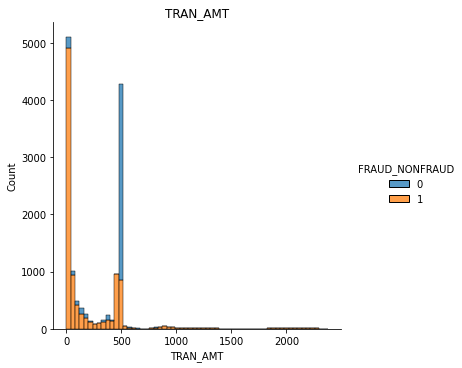

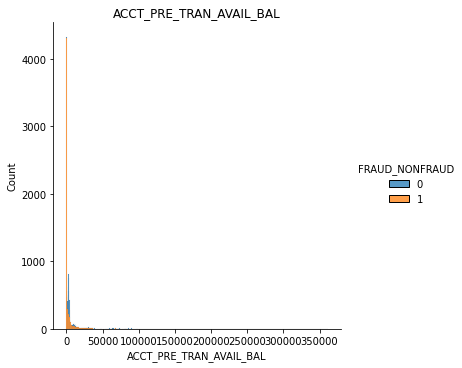

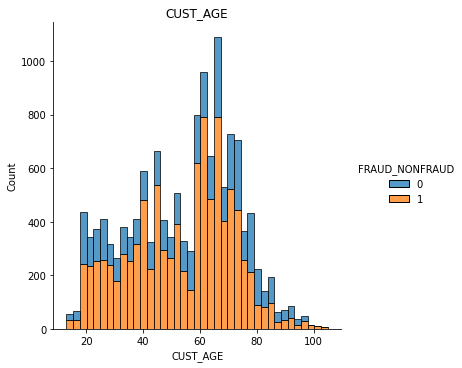

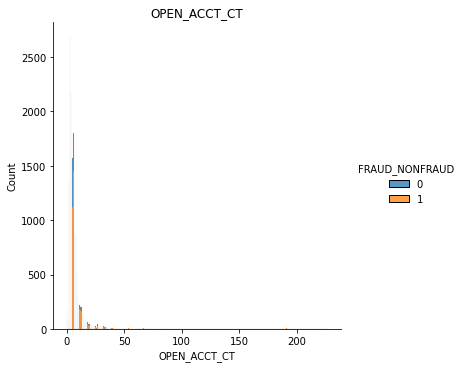

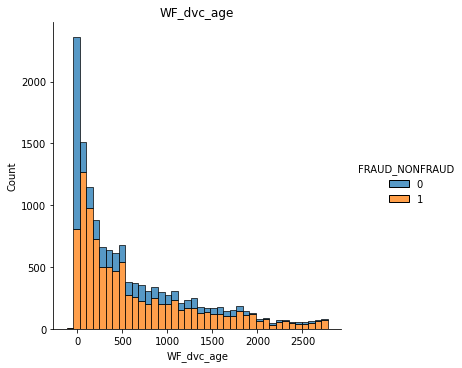

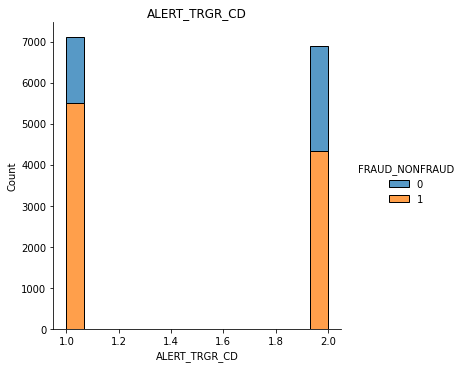

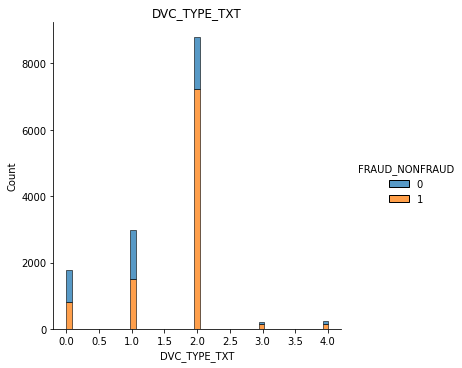

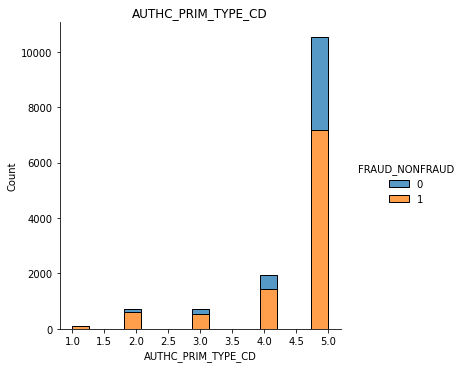

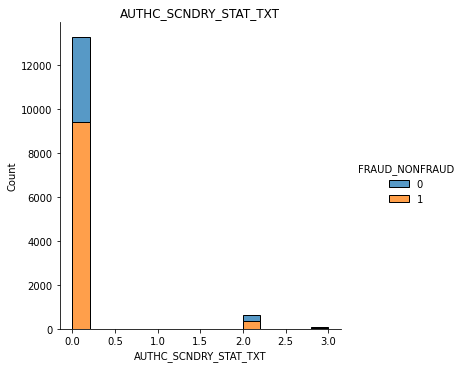

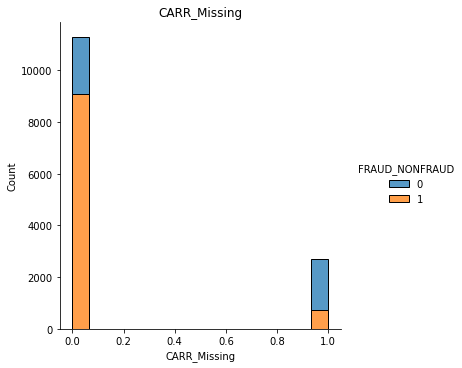

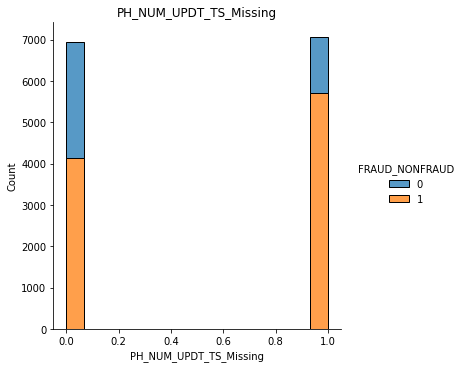

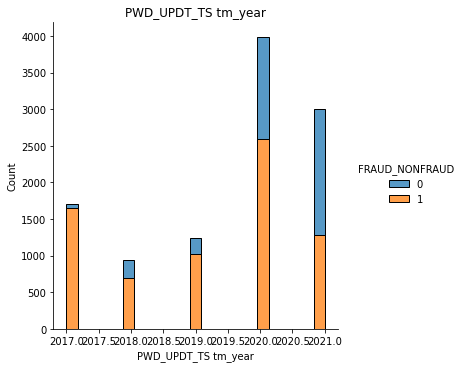

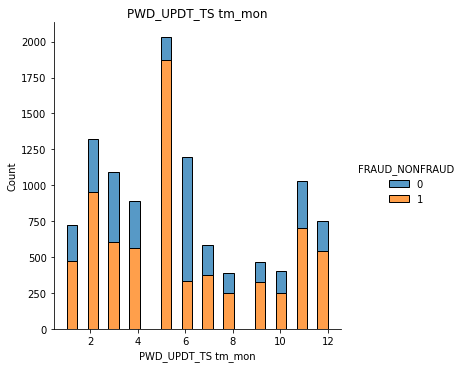

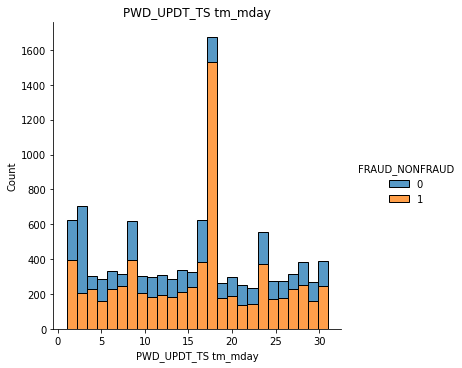

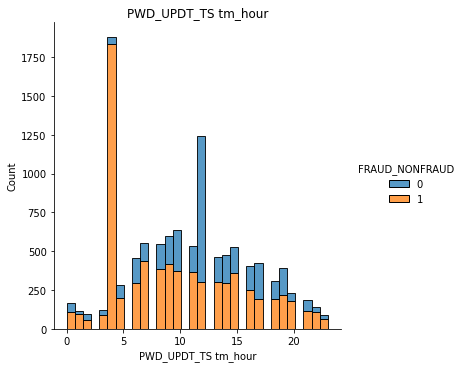

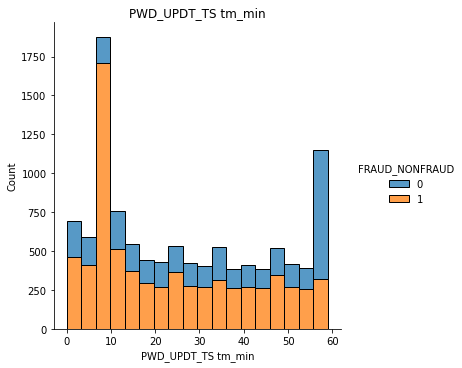

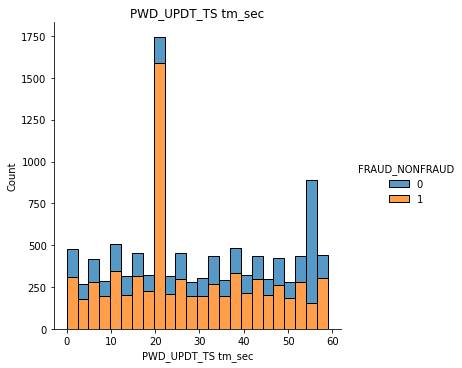

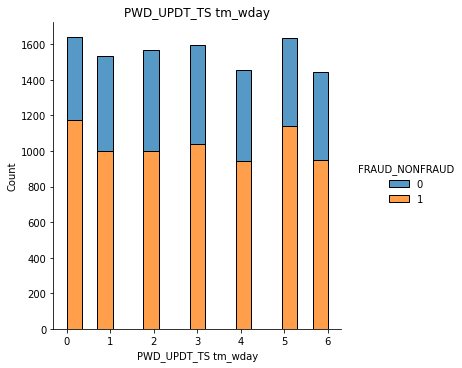

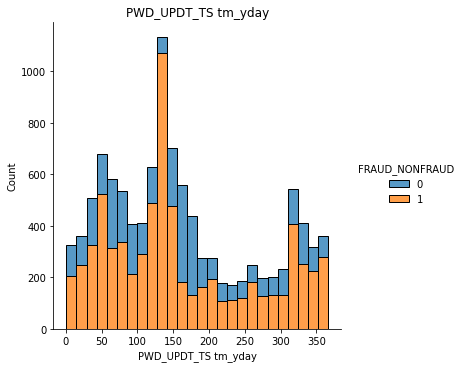

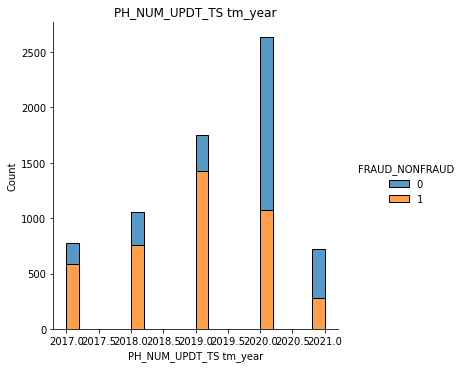

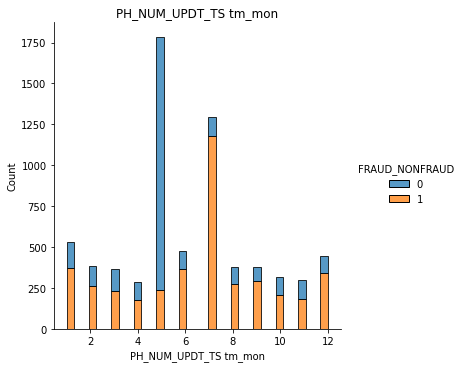

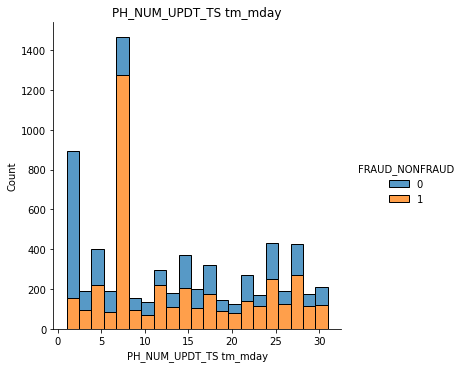

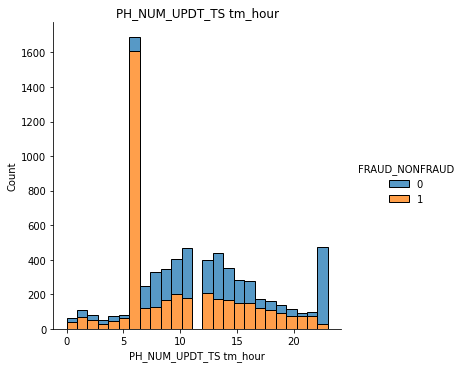

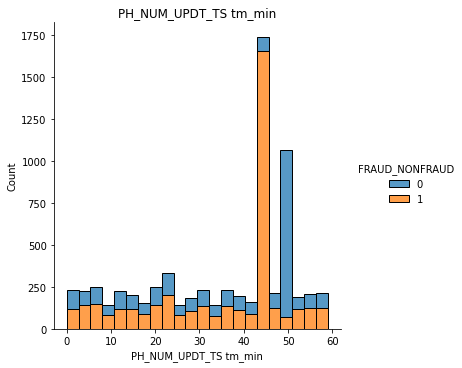

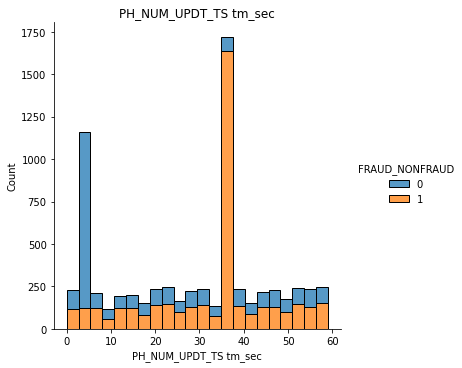

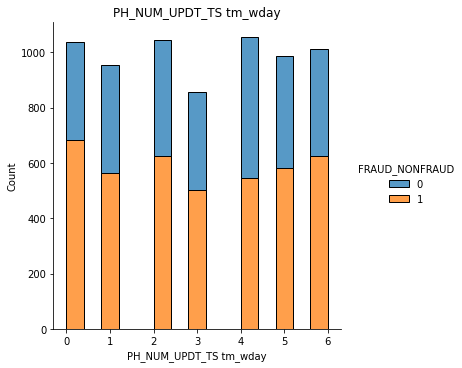

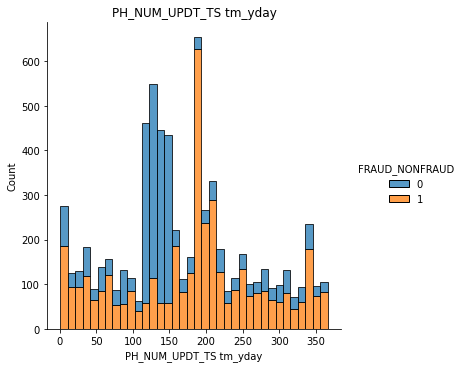

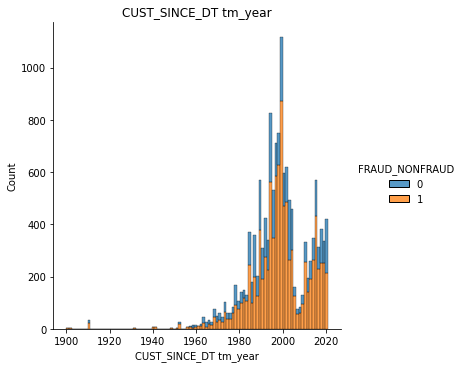

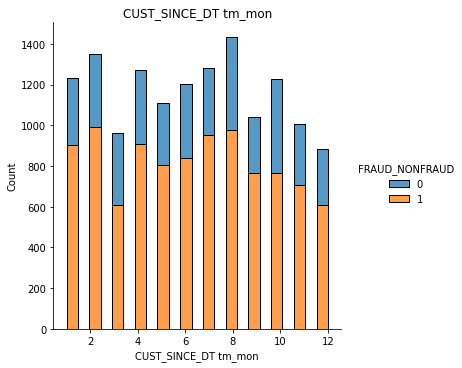

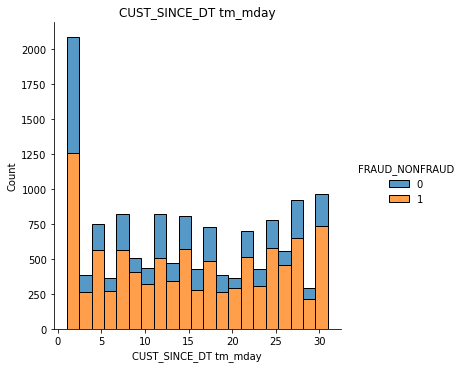

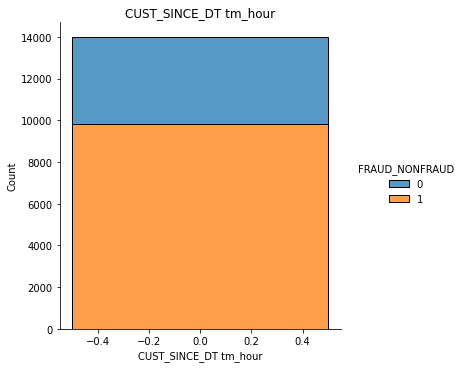

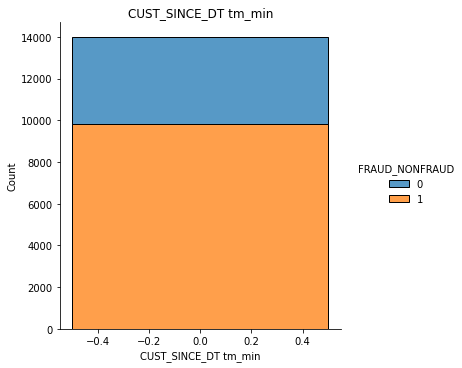

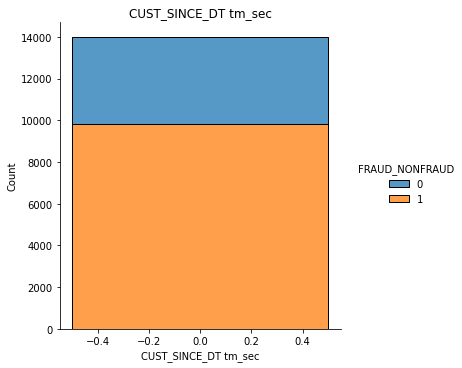

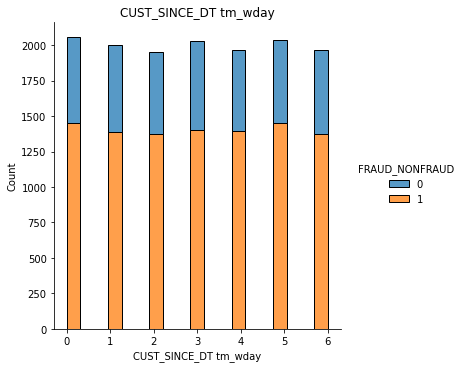

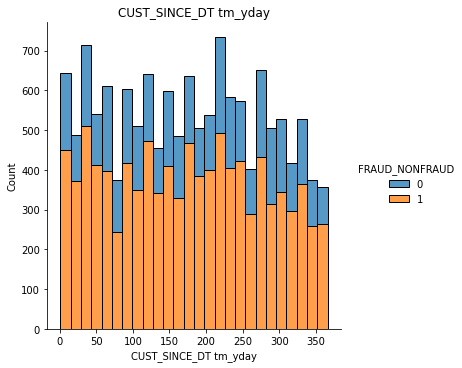

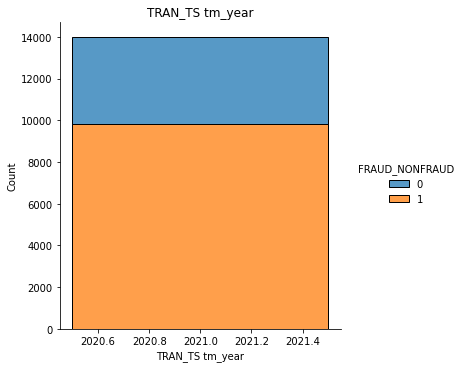

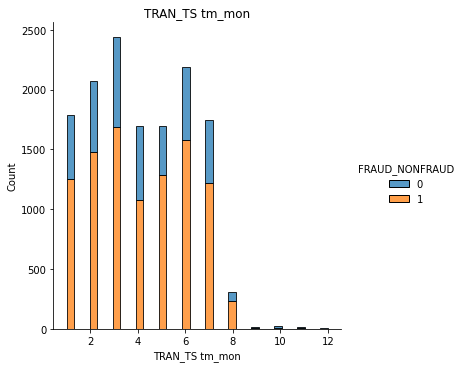

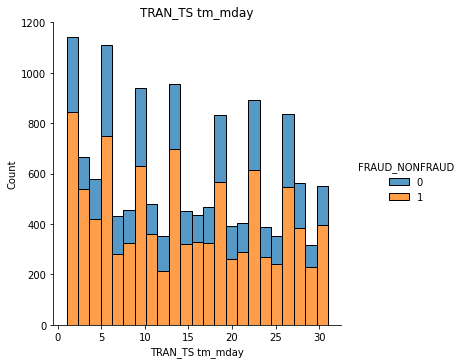

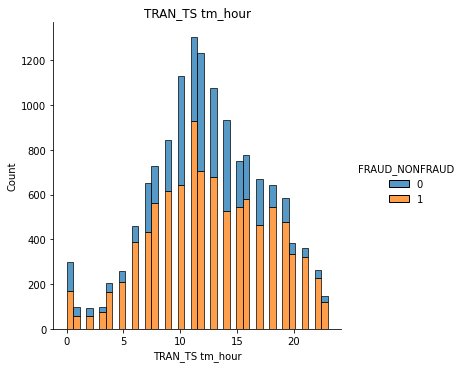

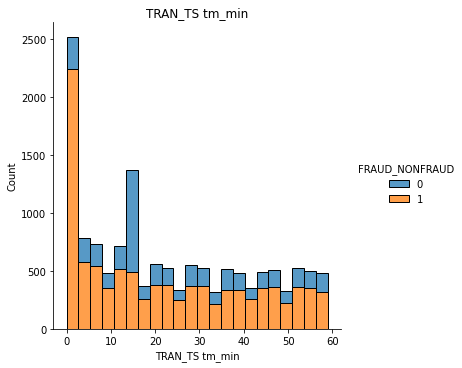

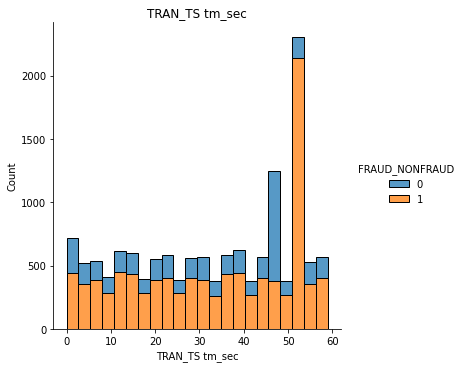

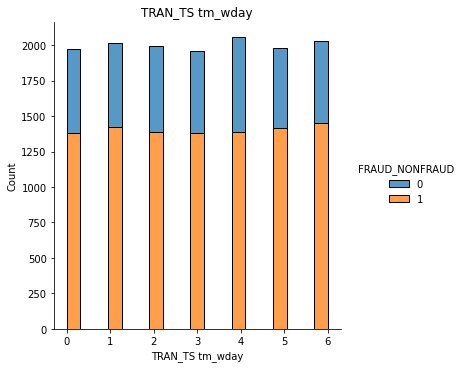

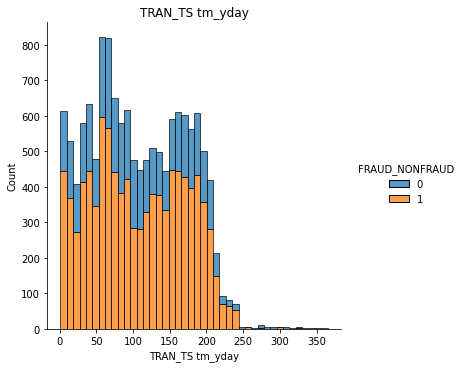

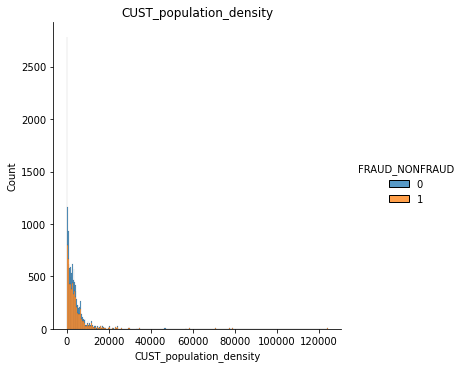

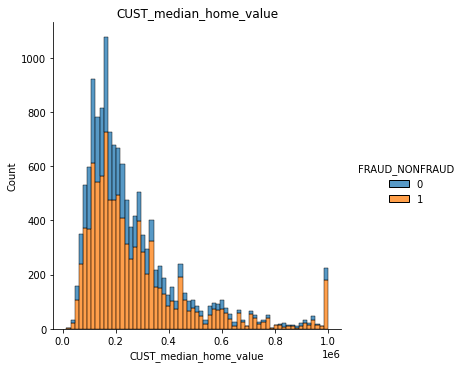

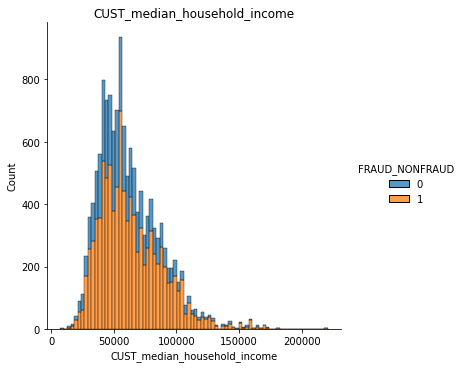

In [10]:
for col in training.columns:
    if col=='FRAUD_NONFRAUD':continue
    
    seaborn.displot(training, x = col, hue = "FRAUD_NONFRAUD", multiple="stack")
    matplotlib.pyplot.title(str(col))
    matplotlib.pyplot.show

In [11]:
# Replace any remaining missing values with averages
for col in training.columns:
    if not training[col].isnull().values.any(): continue
    training[col] = training[col].fillna(training[col].mean() )

In [12]:
# reduce training to just the variables we want to use

# Feature Variables we want to use:
to_use = ['TRAN_AMT', 'WF_dvc_age', 'ALERT_TRGR_CD', 'DVC_TYPE_TXT', 'CARR_Missing', 'PH_NUM_UPDT_TS_Missing' ,
         'PWD_UPDT_TS tm_year', 'PWD_UPDT_TS tm_hour', 'PWD_UPDT_TS tm_min' , 'PH_NUM_UPDT_TS tm_year', 'PH_NUM_UPDT_TS tm_mon',
         'PH_NUM_UPDT_TS tm_hour', 'PH_NUM_UPDT_TS tm_sec', 'PH_NUM_UPDT_TS tm_yday']

tempDF = pandas.DataFrame()
tempDF['FRAUD_NONFRAUD'] = training['FRAUD_NONFRAUD']
for col in to_use:
    tempDF[col] = training[col]
training = tempDF

In [13]:
training.head()

,FRAUD_NONFRAUD,TRAN_AMT,WF_dvc_age,ALERT_TRGR_CD,DVC_TYPE_TXT,CARR_Missing,PH_NUM_UPDT_TS_Missing,PWD_UPDT_TS tm_year,PWD_UPDT_TS tm_hour,PWD_UPDT_TS tm_min,PH_NUM_UPDT_TS tm_year,PH_NUM_UPDT_TS tm_mon,PH_NUM_UPDT_TS tm_hour,PH_NUM_UPDT_TS tm_sec,PH_NUM_UPDT_TS tm_yday
0,1,5.38,2777,1,0.0,0,0,2018.000000,11.000000,3.000000,2021.000000,2.000000,15.000000,10.000000,55.000000
1,1,65.19,2721,1,0.0,0,1,2019.517057,10.498759,26.472184,2019.212134,6.146419,11.200173,28.289091,169.173944
2,0,54.84,1531,2,1.0,0,0,2021.000000,10.000000,42.000000,2019.000000,5.000000,1.000000,39.000000,125.000000
3,1,0.01,835,1,2.0,0,0,2020.000000,7.000000,28.000000,2019.000000,2.000000,6.000000,37.000000,47.000000
4,0,497.08,1095,1,2.0,0,0,2020.000000,12.000000,12.000000,2020.000000,5.000000,10.000000,6.000000,129.000000


In [14]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FRAUD_NONFRAUD          14000 non-null  int64  
 1   TRAN_AMT                14000 non-null  float64
 2   WF_dvc_age              14000 non-null  int64  
 3   ALERT_TRGR_CD           14000 non-null  int64  
 4   DVC_TYPE_TXT            14000 non-null  float64
 5   CARR_Missing            14000 non-null  int32  
 6   PH_NUM_UPDT_TS_Missing  14000 non-null  int32  
 7   PWD_UPDT_TS tm_year     14000 non-null  float64
 8   PWD_UPDT_TS tm_hour     14000 non-null  float64
 9   PWD_UPDT_TS tm_min      14000 non-null  float64
 10  PH_NUM_UPDT_TS tm_year  14000 non-null  float64
 11  PH_NUM_UPDT_TS tm_mon   14000 non-null  float64
 12  PH_NUM_UPDT_TS tm_hour  14000 non-null  float64
 13  PH_NUM_UPDT_TS tm_sec   14000 non-null  float64
 14  PH_NUM_UPDT_TS tm_yday  14000 non-null